# Machine Learning and Artificial Intelligence 
## 1 - Introduction to Supervised Machine Learning

**Author:** <a href="https://www.cs.columbia.edu/~bauer">Daniel Bauer &lt;bauer@cs.columbia.edu&gt;</a>

In this section, we will look at the basics of supervised machine learning, starting with an example data set. 

**Overview:**


Mini project: 

## 1.1 Motivating example 

Consider a simple function, such as $f(x) = 2x^2 + 3x + 5$.
Suppose we want to plot the function for some values of x. We first define this as a Python function. 

In [1]:
def f(x): 
    return 2*x**2 + 3*x + 5

In [2]:
inputs = list(range(20))

In [3]:
outputs = [f(x) for x in inputs] 

# This syntax is called a list comprehension. You can read it like this: 
# for each x in inputs, evaluate f(x) and store the results in a new list.

In [4]:
outputs

[5,
 10,
 19,
 32,
 49,
 70,
 95,
 124,
 157,
 194,
 235,
 280,
 329,
 382,
 439,
 500,
 565,
 634,
 707,
 784]

We can then plot the result (more on data visualization later). The x axis shows the inputs and the y axis shows the outputs.

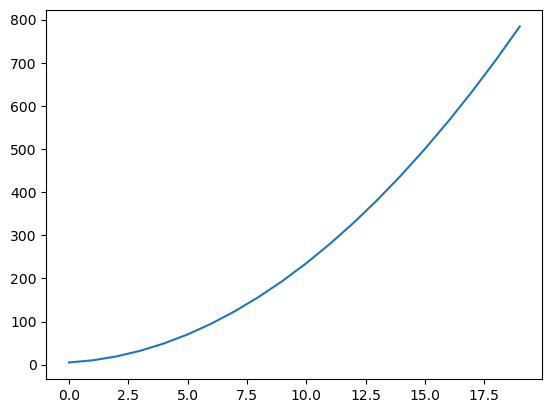

In [5]:
from matplotlib import pyplot as plt
plt.plot(inputs, outputs)

Now, assume we didn't have the original function f. 

In [6]:
del f # delete the function f
f(10) # oops

NameError: name 'f' is not defined

We only have a few example points on this curve (such as the ones in the input and output lists -- or you could measure certain points using a ruler by hand). 

**A machine learning problem: Can we recover function f(x) (or at least an approximation of it) from these input and output examples?**

Note: This is an easy problem to solve by hand if the plot is a straight line, where you can just find the slope and intercept. It's harder for a polynomial. You could set up a system of equations and then solve for the coefficients.

But what if the data contains outliers (that do not exactly lie on the curve)?
With such outlies, and as the function becomes more complex, we have to make stronger assumptions about what the form of the function is. This is known as **inductive bias**. 

The machine learning algorithm should learn from the provided input/output pairs and return a function we can call to produce missing outputs for any unseen input.

Conceptually, this might look something like this: 

In [7]:
class AbstractMLModel:
    
    def __init__(self): 
        pass
    
    def fit(input_list_x, output_list_y):
        """ 
        Train the model on a list of input and output pairs.
        """
        pass
    
    def predict(new_x):
        """
        Return the output predicted by the model for input new_x, 
        even if new_x has not been seen during training.
        """
        pass

## 1.2 The Penguin Data Set

Let's make this more concrete. 
As a first hands-on example, we will work with the Palmer Penguin Data Set. 
More info: https://allisonhorst.github.io/palmerpenguins/articles/intro.html

The data set contains information about different penguin individuals from three different species, observed on three different islands in the Palmer Achipelgo (Antarctica). 

The three species are Chinstrap, Gentoo, and Adélie penguins. 

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width="600px"> (artwork by Allison Horst @allisonhorst).

### 1.2.1 Loading the Data

Many Machine Learning datasets for classification tasks are represented as tabular data. The data is provided in a comma separated value (CSV) file. 

In [49]:
with open("palmer_penguins.csv",'r') as penguin_file: 
    for i in range(5):
        print(penguin_file.readline().strip())

species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,39.1,18.7,181,3750,2
1,39.5,17.4,186,3800,1
1,40.3,18.0,195,3250,1
1,36.7,19.3,193,3450,1


For convenience, we will use [pandas](https://pandas.pydata.org/), which is a popular library for working with data.

In [50]:
import pandas as pd
penguins = pd.read_csv("palmer_penguins.csv")

In [51]:
penguins

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,39.1,18.7,181,3750,2
1,1,39.5,17.4,186,3800,1
2,1,40.3,18.0,195,3250,1
3,1,36.7,19.3,193,3450,1
4,1,39.3,20.6,190,3650,2
...,...,...,...,...,...,...
328,3,55.8,19.8,207,4000,2
329,3,43.5,18.1,202,3400,1
330,3,49.6,18.2,193,3775,2
331,3,50.8,19.0,210,4100,2


The first column is the **label/class** and identifies the species of each penguin: 1 - Chinstrap, 2 - Gentoo, and 3 - Adélie

For each penguin, the dataset records 4 **attributes / features**:

* bill length in milimeters (mm)
* bill depth in mm 
* flipper length in mm 
* body mass in grams (g)

It also records the sex of the penguin (1 - female, 2 - male), but we will ignore that information for now. 

Each penguin can therefore be represented as a feature vector of length 4. 

In [60]:
penguins.iloc[0] # Get the first row
penguins.iloc[0][1:5] # get column index 1 through 5 (5 is not included)

bill_length_mm         39.1
bill_depth_mm          18.7
flipper_length_mm     181.0
body_mass_g          3750.0
Name: 0, dtype: float64

In [63]:
penguins.iloc[0][1:5].to_numpy() # feature vector for the first penguin

array([  39.1,   18.7,  181. , 3750. ])

Our goal is to train machine learning model to predict the penguin species from a feature vector. 

### 1.2.2 Train / Test / Dev Split

After training a model, we need to see how will it performance on the classification task. We want to get a sense of how well model will do on inputs that the model has not seen during training. Testing the model on the training data would also be unreasonably easy. 

We split the available data into a training portion, a testing portion, and a development portion. The model is trained on the training portion and then tested on the test portion. 
Our hypothesis is that a model that learns to classify the training data correctly will also classify the test data correctly -- but there is a risk of overfitting the model to the training data (more about this later). 

The development portion is used to optimize **hyperparameters**, which are settings of the machine learning algorithm (and method) selected by the developer. We often select hyperparameters that result in goof performance on the development portion (after training on the training portion). Then we perform a single final evaluation on the test data -- these are the results usually reported when comparing the performance of different ML approaches.

**important:** Never touch (or even look at) the test data while training the model. 

First we split the data, then we split it into 80% training, 10% development, and 10% test.
Shuffling ensures that all labels are represented roughly evenly in each of the sets (in the original data, the penguins were sorte by class)

In [68]:
penguins_shuffled = penguins.sample(frac=1) # shuffle the rows.

In [69]:
penguins_shuffled

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
183,2,44.0,13.6,208,4350,1
247,2,49.1,15.0,228,5500,2
236,2,45.5,14.5,212,4750,1
143,1,37.8,18.1,193,3750,2
33,1,37.6,19.3,181,3300,1
...,...,...,...,...,...,...
69,1,42.8,18.5,195,4250,2
19,1,38.8,17.2,180,3800,2
75,1,42.9,17.6,196,4700,2
175,2,47.3,15.3,222,5250,2


In [70]:
333 * 0.8

266.40000000000003

In [82]:
train = penguins_shuffled[:266]
len(train)

266

In [74]:
heldout = penguins_shuffled[266:]
len(heldout)

67

In [78]:
dev = heldout[:33]
test = heldout[33:]

In [79]:
len(dev)

33

In [80]:
len(test)

34

### 1.2.3 Exploring and visualizing the data

Matplotlib is a popular data visualization package for Python.

In [84]:
from matplotlib import pyplot as plt

In [90]:
chinstrap = train[train["species"] == 1]
gentoo = train[train["species"] == 2]
adelie = train[train["species"] == 3]

In [91]:
len(chinstrap)

119

In [92]:
len(gentoo)

97

In [93]:
len(adelie)

50

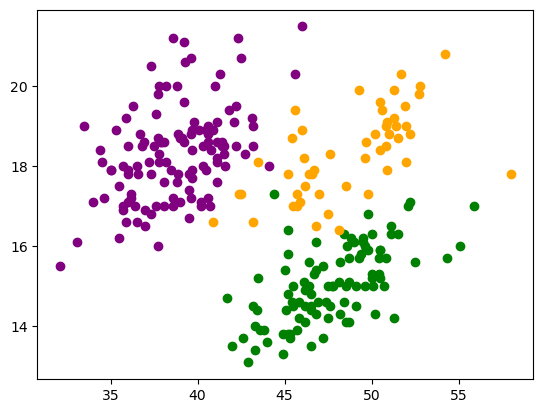

In [98]:
plt.scatter(chinstrap["bill_length_mm"], chinstrap["bill_depth_mm"], color="purple")
plt.scatter(gentoo["bill_length_mm"], gentoo["bill_depth_mm"], color="green")
plt.scatter(adelie["bill_length_mm"], adelie["bill_depth_mm"], color="orange")

## 1.2.4 training a classifier using scikit learn

In [113]:
train_target = train["species"]

In [118]:
train_input = train[train.columns[1:5]]

In [120]:
train_input

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
183,44.0,13.6,208,4350
247,49.1,15.0,228,5500
236,45.5,14.5,212,4750
143,37.8,18.1,193,3750
33,37.6,19.3,181,3300
...,...,...,...,...
34,39.8,19.1,184,4650
119,40.6,19.0,199,4000
222,45.2,13.8,215,4750
122,39.0,17.1,191,3050


In [139]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(train_input, train_target)

DecisionTreeClassifier()

In [144]:
test_target = test["species"]
test_input = test[test.columns[1:5]]

classifier.score(test_input, test_target)

0.9411764705882353

In [145]:
print(classifier)

DecisionTreeClassifier()
